In [1]:
import PIL as pil
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
# Define some common functions
def img2array(img):
    nrow = img.size[1]
    ncol = img.size[0]
    img_map = img.load()
    myarray = np.zeros([nrow,ncol,3], dtype=np.uint8)
    for i in range(nrow):
        for j in range(ncol):
            myarray[i,j,0] = img_map[j,i][0]
            myarray[i,j,1] = img_map[j,i][1]
            myarray[i,j,2] = img_map[j,i][2]
    return myarray

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

mygauss = gaussian_kernel(5, sigma=1.4)

def applyGaussFilter(image, kernel):
    n, m = image.shape
    new_image = np.zeros([n,m])
    
    for i in range(0,n):
        for j in range(0,m):
            mysum = 0; 
            if i-2 >= 0 and i-2 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i-2,j-2]*kernel[0,0]
            if i-2 >= 0 and i-2 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i-2,j-1]*kernel[0,1]
            if i-2 >= 0 and i-2 < n and j >= 0 and j < m:
                mysum = mysum + image[i-2,j]*kernel[0,2]
            if i-2 >= 0 and i-2 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i-2,j+1]*kernel[0,3]
            if i-2 >= 0 and i-2 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i-2,j+2]*kernel[0,4]
            if i-1 >= 0 and i-1 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i-1,j-2]*kernel[1,0]
            if i-1 >= 0 and i-1 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i-1,j-1]*kernel[1,1]
            if i-1 >= 0 and i-1 < n and j >= 0 and j < m:
                mysum = mysum + image[i-1,j]*kernel[1,2]
            if i-1 >= 0 and i-1 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i-1,j+1]*kernel[1,3]
            if i-1 >= 0 and i-1 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i-1,j+2]*kernel[1,4]
            if i >= 0 and i < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i,j-2]*kernel[2,0]
            if i >= 0 and i < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i,j-1]*kernel[2,1]
            if i >= 0 and i < n and j >= 0 and j < m:
                mysum = mysum + image[i,j]*kernel[2,2]
            if i >= 0 and i < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i,j+1]*kernel[2,3]
            if i >= 0 and i < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i,j+2]*kernel[2,4]
            if i+1 >= 0 and i+1 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i+1,j-2]*kernel[3,0]
            if i+1 >= 0 and i+1 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i+1,j-1]*kernel[3,1]
            if i+1 >= 0 and i+1 < n and j >= 0 and j < m:
                mysum = mysum + image[i+1,j]*kernel[3,2]
            if i+1 >= 0 and i+1 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i+1,j+1]*kernel[3,3]
            if i+1 >= 0 and i+1 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i+1,j+2]*kernel[3,4]
            if i+2 >= 0 and i+2 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i+2,j-2]*kernel[4,0]
            if i+2 >= 0 and i+2 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i+2,j-1]*kernel[4,1]
            if i+2 >= 0 and i+2 < n and j >= 0 and j < m:
                mysum = mysum + image[i+2,j]*kernel[4,2]
            if i+2 >= 0 and i+2 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i+2,j+1]*kernel[4,3]
            if i+2 >= 0 and i+2 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i+2,j+2]*kernel[4,4]
            new_image[i,j] = mysum
                
    return new_image

def calculateGradient(img):
    m, n = img.shape
    Gx = np.zeros([m, n])
    Gy = np.zeros([m, n])
    G = np.zeros([m,n])
    theta = np.zeros([m,n])
    for i in range(1,m-1):
        for j in range(1,n-1):
            Gx[i, j] = 1.0*img[i+1,j-1] + 2.0*img[i+1,j] + 1.0*img[i+1,j+1] - 1.0*img[i-1,j-1] - 2.0*img[i-1,j] - 1.0*img[i-1,j+1]
            Gy[i, j] = - 1.0*img[i-1,j+1] - 2.0*img[i,j+1] - 1.0*img[i+1,j+1] + 1.0*img[i-1,j-1] + 2.0*img[i,j-1] + 1.0*img[i+1,j-1]
            G[i,j] = math.sqrt(Gx[i,j]*Gx[i,j]+Gy[i,j]*Gy[i,j])
            if Gy[i,j]!=0:
                theta[i,j] = math.atan(Gx[i,j]/Gy[i,j])
            
    return Gx,Gy,G,theta

def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    img_out = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(100)
    strong = np.int32(255)

    for i in range(0, M):
        for j in range(0, N):
            if img[i,j]>= highThreshold:
                img_out[i,j] = strong
            elif img[i,j] < highThreshold and img[i,j] >= lowThreshold:
                img_out[i,j] = weak
            else:
                img_out[i,j] = 0
    
    return (img_out, weak, strong)

def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    img_out = np.copy(img)
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img_out[i,j] == weak):
                try:
                    if ((img_out[i+1, j-1] == strong) or (img_out[i+1, j] == strong) or (img_out[i+1, j+1] == strong)
                        or (img_out[i, j-1] == strong) or (img_out[i, j+1] == strong)
                        or (img_out[i-1, j-1] == strong) or (img_out[i-1, j] == strong) or (img_out[i-1, j+1] == strong)):
                        img_out[i, j] = strong
                    else:
                        img_out[i, j] = 0
                except IndexError as e:
                    pass
    return img_out

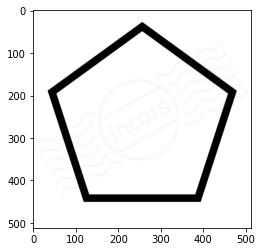

In [3]:
apic = pil.Image.open("../Image/shape_pentagon.png")
myimg = img2array(apic)
plt.imshow(myimg)

In [4]:
# Change to gray scale image
mygrayimg = rgb2gray(myimg)
# Apply Gaussian Filter
mygraysmoothimg=applyGaussFilter(mygrayimg, mygauss)
# Calculate Gradients and Angles
Gx, Gy, G, theta = calculateGradient(mygraysmoothimg)
# Calculate Non Max Suppression
NMS_G = non_max_suppression(G, theta)
# Calculate double threshold
mythreshold, weak, strong = threshold(NMS_G, 0.001, 0.1)
# Calculate hysteresis
myhysteresis = hysteresis(mythreshold, weak)

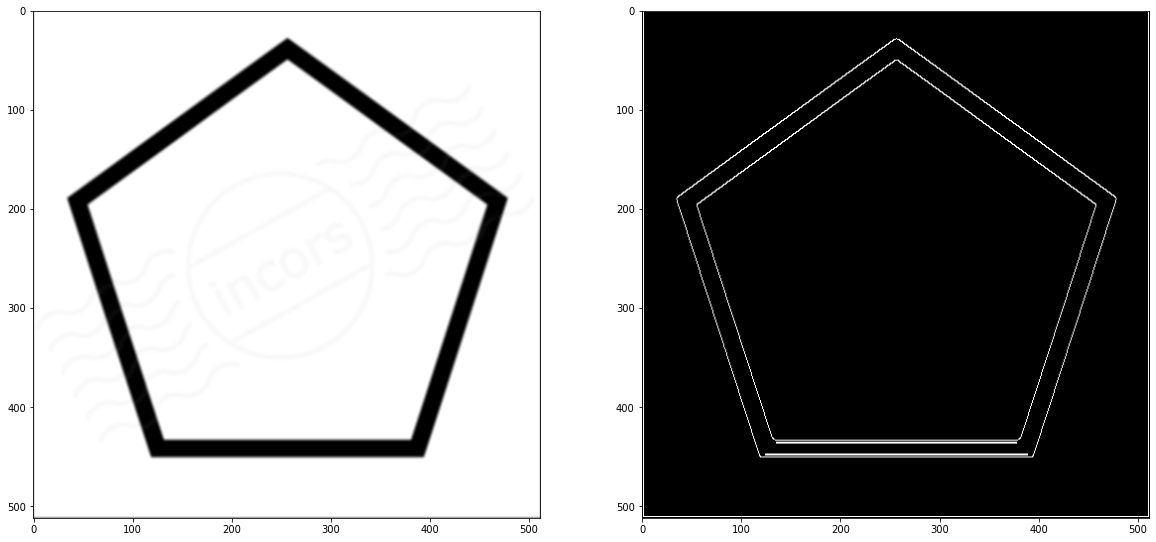

In [5]:
# Smooth vs. Hysteresis
f, axarr = plt.subplots(1,2, figsize=(20, 20))
axarr[0].imshow(mygraysmoothimg, cmap='gray')
axarr[1].imshow(myhysteresis, cmap='gray')

In [161]:
def hough_line(img, theta_res=1, rho_res=1, pfrac=0.1):
    x_max = img.shape[0]
    y_max = img.shape[1]
    
    # Rho and Theta ranges
    thetas = np.zeros([int(np.ceil(180.0/theta_res)), 1]) #np.linspace(0, 180, int(np.ceil(180.0/theta_res)))
    thetas = (np.pi/180.0)*thetas
    
    width, height = img.shape
    diag_len = np.ceil(np.sqrt(width * width + height * height))   # max_dist
    rhos = np.zeros([int(np.ceil(diag_len/rho_res)), 1]) #np.linspace(0, diag_len, int(np.ceil(diag_len/rho_res)))

    # Cache some resuable values
#     cos_t = np.cos(thetas)
#     sin_t = np.sin(thetas)
    num_thetas = len(thetas)
    num_rhos = len(rhos)
    nhalf_rhos = int(num_rhos/2) + 1
    
#   print("num_rhos: " + str(num_rhos))
#   print("nhalf_rhos: " + str(nhalf_rhos))

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((num_rhos, num_thetas))
#     y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges
    
#     print("length y_idxs: " + str(len(y_idxs)))
#     pick_idxs = np.random.randint(len(y_idxs), size=int(len(y_idxs)*pfrac))
#     print("length pick_idxs: " + str(len(pick_idxs)))

#     print("thetas len: " + str(len(thetas)))
#     print("rhos len: " + str(len(rhos)))

    theta_max = 1.0 * math.pi 
    theta_min = 0.0
    
    r_min = 0.0
    r_max = math.hypot(x_max, y_max)
    r_dim = 200 
    theta_dim = 300

    # Vote in the hough accumulator
    for i in range(x_max):
        for j in range(y_max):
            if img[i,j]:
                for itheta in range(num_thetas):
#                     rho = i * cos_t[t_idx] + j * sin_t[t_idx]
#                     rhoIdx = int(rho/rho_res) 
# #                     if rho
#                     accumulator[rhoIdx, t_idx] += 1
                    theta = 1.0 * itheta * theta_max / theta_dim
                    r = i * math.cos(theta) + j * math.sin(theta)
                    ir = int(r_dim * ( 1.0 * r ) / r_max)
                    accumulator[ir,itheta] = accumulator[ir,itheta] + 1
                        
    return accumulator

In [162]:
from datetime import datetime
start_time = datetime.now()
myHoughimg = hough_line(myhysteresis, 0.6, 3.64, 0.1)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:07.880792


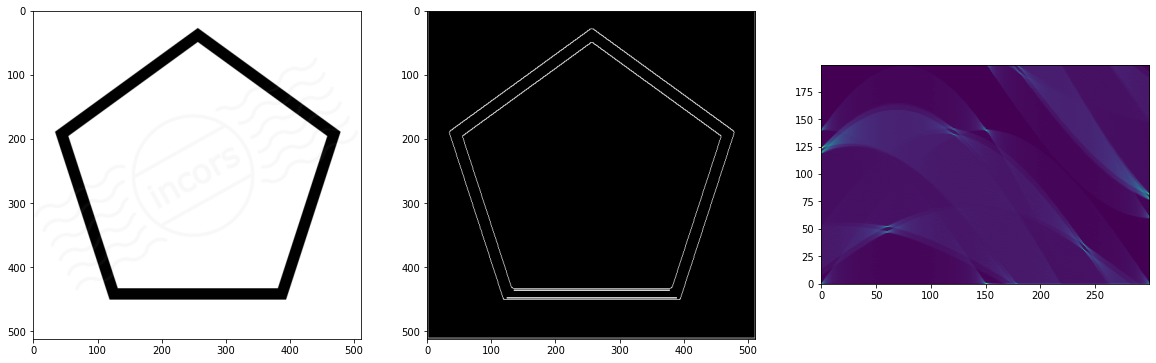

In [158]:
# Orig vs. Gray vs. Hough transform
f, axarr = plt.subplots(1,3, figsize=(20, 20))
axarr[0].imshow(myimg)
axarr[1].imshow(myhysteresis, cmap='gray')
axarr[2].imshow(myHoughimg, origin='lower')

x [0.0, 150.0, 178.0, 217.0, 265.0, 299.0, 240.0, 60.0, 299.0, 299.0, 1.0, 0.0, 150.0, 120.0, 180.0, 152.0]
y [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35.0, 47.0, 60.0, 81.0, 124.0, 140.0, 140.0, 141.0, 193.0, 199.0]


/tmp/ipykernel_4187/2294341277.py:15: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(myHoughimg, neighborhood_size)
/tmp/ipykernel_4187/2294341277.py:19: DeprecationWarning: Please use `minimum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_min = filters.minimum_filter(myHoughimg, neighborhood_size)


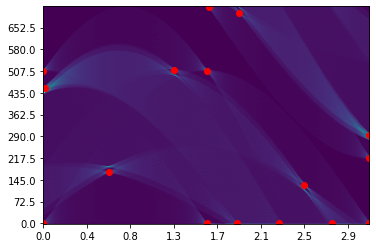

In [159]:
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage

neighborhood_size = 20
threshold = 50

width, height = myhysteresis.shape
r_max = np.ceil(np.sqrt(width * width + height * height))   # max_dis
theta_max = np.pi
r_dim, theta_dim = myHoughimg.shape

x_max = width
y_max = height

data_max = filters.maximum_filter(myHoughimg, neighborhood_size)
maxima = (myHoughimg == data_max)


data_min = filters.minimum_filter(myHoughimg, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)

x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)

print("x", x)
print("y", y)

plt.imshow(myHoughimg, origin='lower')
tick_locs = [i for i in range(0,theta_dim,40)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,40)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.autoscale(False)
plt.plot(x,y, 'ro')

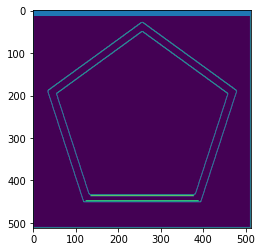

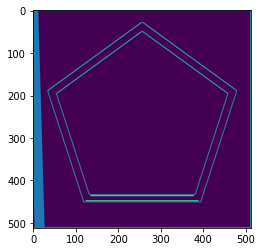

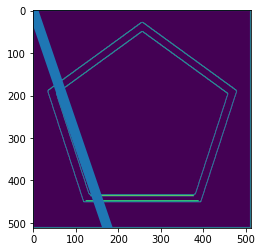

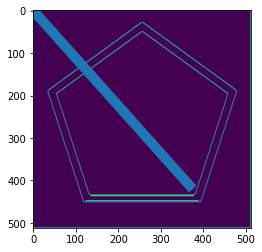

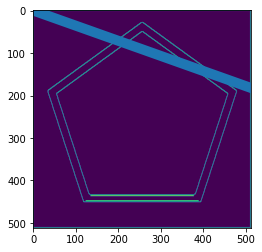

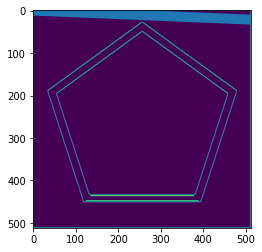

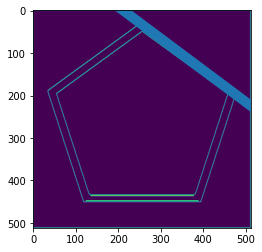

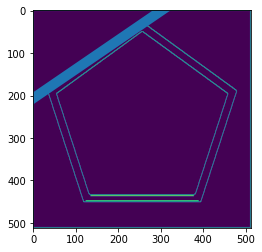

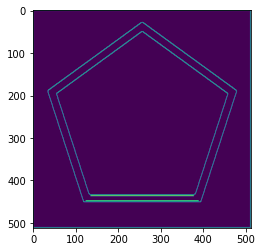

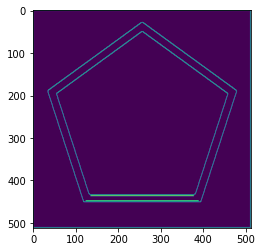

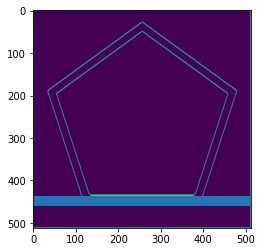

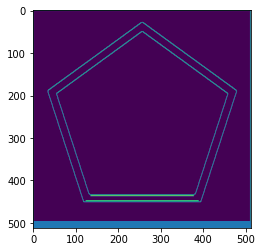

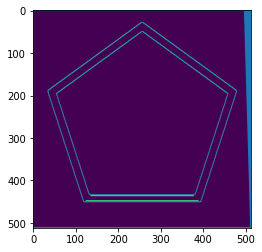

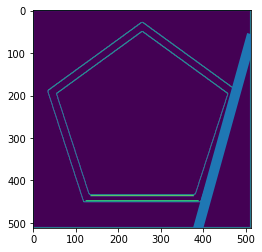

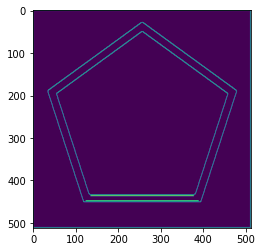

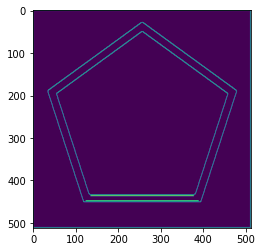

In [160]:
# Step 4: Plot lines

line_index = 1
width, height = myhysteresis.shape
r_max = np.ceil(np.sqrt(width * width + height * height))   # max_dis
theta_max = np.pi
r_dim, theta_dim = myHoughimg.shape

x_max = width
y_max = height


for i,j in zip(y, x):

    r = round( (1.0 * i * r_max ) / r_dim,1)
    theta = round( (1.0 * j * theta_max) / theta_dim,1)

    fig, ax = plt.subplots()

    ax.imshow(myhysteresis)

    ax.autoscale(False)

    px = []
    py = []
    for i in range(-y_max-40,y_max+40,1):
        px.append( math.cos(-theta) * i - math.sin(-theta) * r ) 
        py.append( math.sin(-theta) * i + math.cos(-theta) * r )

    ax.plot(px,py, linewidth=10)

In [126]:
rhos

array([  0.        ,   3.64321608,   7.28643216,  10.92964824,
        14.57286432,  18.2160804 ,  21.85929648,  25.50251256,
        29.14572864,  32.78894472,  36.4321608 ,  40.07537688,
        43.71859296,  47.36180905,  51.00502513,  54.64824121,
        58.29145729,  61.93467337,  65.57788945,  69.22110553,
        72.86432161,  76.50753769,  80.15075377,  83.79396985,
        87.43718593,  91.08040201,  94.72361809,  98.36683417,
       102.01005025, 105.65326633, 109.29648241, 112.93969849,
       116.58291457, 120.22613065, 123.86934673, 127.51256281,
       131.15577889, 134.79899497, 138.44221106, 142.08542714,
       145.72864322, 149.3718593 , 153.01507538, 156.65829146,
       160.30150754, 163.94472362, 167.5879397 , 171.23115578,
       174.87437186, 178.51758794, 182.16080402, 185.8040201 ,
       189.44723618, 193.09045226, 196.73366834, 200.37688442,
       204.0201005 , 207.66331658, 211.30653266, 214.94974874,
       218.59296482, 222.2361809 , 225.87939698, 229.52

In [127]:
myhysteresis.shape

(512, 512)

In [128]:
myHoughimg.shape

(200, 300)

In [129]:
np.cos(np.pi)

-1.0

In [130]:
math.cos(np.pi)

-1.0

In [71]:
rhos[len(rhos)-1]

725.0